In [ ]:
# Importing Libaries

import ast
import seaborn as sns
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

In [3]:
df_US = df[df['job_country'] == "United States"].dropna(subset=['salary_year_avg']).copy()

In [4]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

In [5]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

job_order = df_US_top6.groupby(by="job_title_short")['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

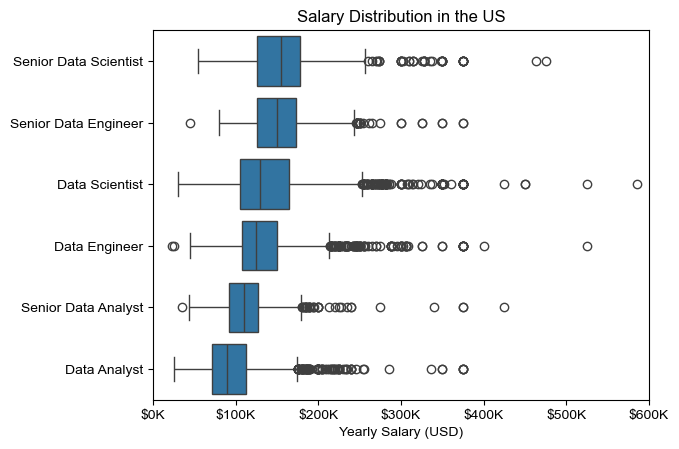

In [6]:
sns.boxplot(data=df_US_top6, x="salary_year_avg", y="job_title_short", order=job_order)
sns.set_theme(style="ticks")

plt.title("Salary Distribution in the US")
plt.xlabel("Yearly Salary (USD)")
plt.ylabel("")
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

## Investigate Median Salary VS Skill for Data Analysts

In [7]:
df_DA_US = df[(df['job_title_short'] == "Data Analyst") & (df['job_country'] == "United States")].copy()

In [8]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [9]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [18]:
df_DA_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending=False)

In [19]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by="median", ascending=False).head(10)


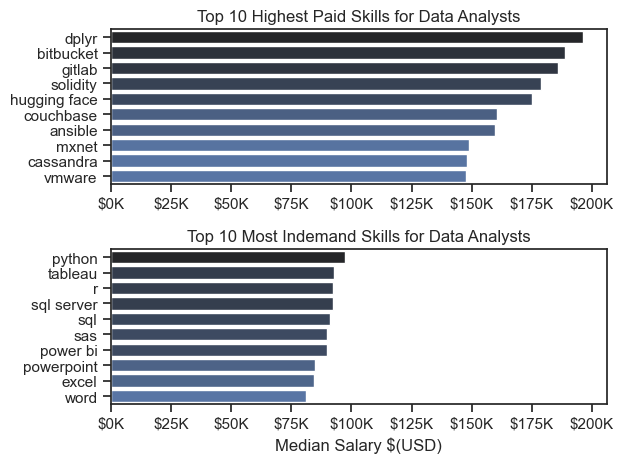

In [20]:
fig, ax= plt.subplots(2,1)

sns.set_theme(style="ticks")

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))

# Top 10 Most Indemand Skills for Data Analysts
sns.barplot(data=df_DA_top_skills, x='median', y=df_DA_top_skills.index, hue='median', ax=ax[1], palette='dark:b_r')
ax[1].legend().remove()
ax[1].set_title('Top 10 Most Indemand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary $(USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()